importing dependencies

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #to standardize data
from sklearn.model_selection import train_test_split #for spliting data
from sklearn import svm
from sklearn.metrics import accuracy_score

# data collection and anaylysis 

In [28]:
#loading the data set
file_path = "C:/Users/ASUS/Desktop/datascience/jupyter_notebook/DiabetesPrediction/diabetes.csv"

# Read the CSV file
diabetes_dataset = pd.read_csv(file_path)

# Display the first few rows
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
#number of rows and columns
diabetes_dataset.shape

(768, 9)

In [30]:
#getting the statistical measures
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
#counting outcomes
diabetes_dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0---------> no diabetes
1---------> with diabets

In [32]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [33]:
#seperating data and labels
X=diabetes_dataset.drop(columns='Outcome',axis= 1)  #axis=1 since u are dropping a column axis =0 if u are dropping a row
Y=diabetes_dataset['Outcome']
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


# Exploritary data analysis

predecting diabetic risk


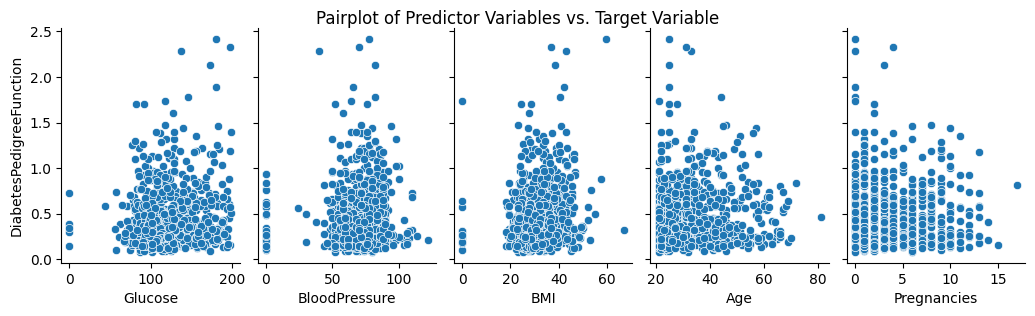

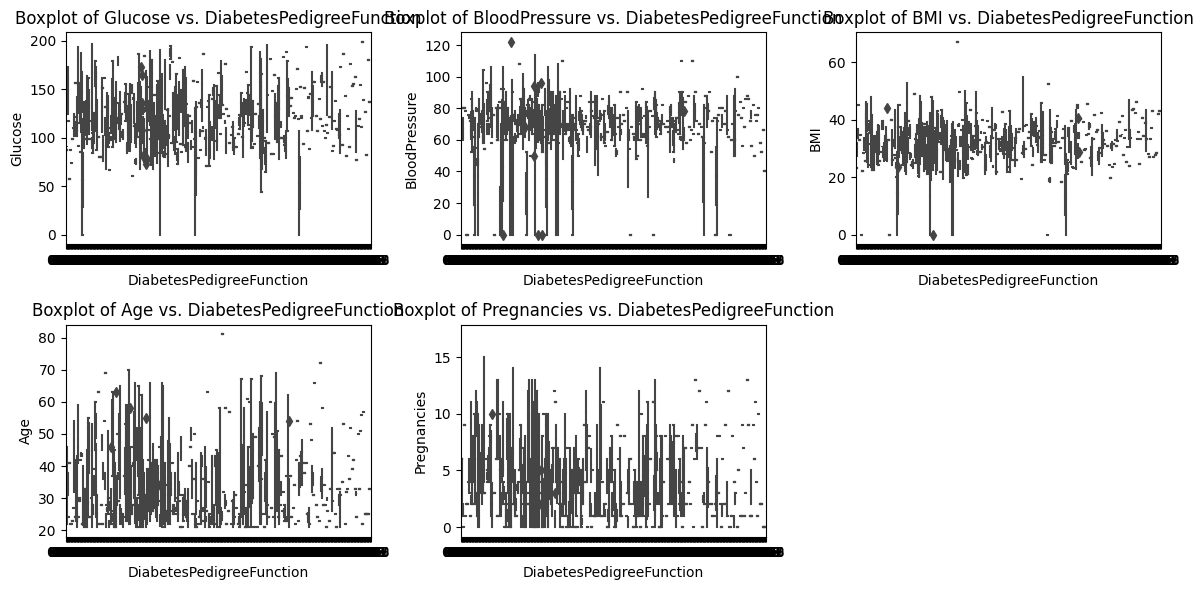

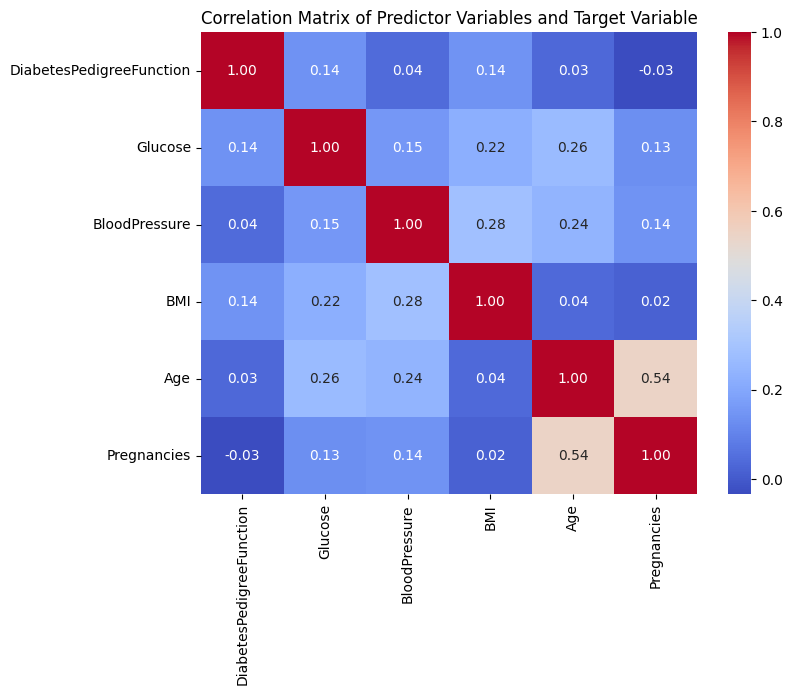

In [34]:

# Target variable
target_variable = 'DiabetesPedigreeFunction'
predictor_variables = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Pregnancies']
# Pairplot to visualize relationships between predictor variables and target variable
sns.pairplot(diabetes_dataset, x_vars=predictor_variables, y_vars=target_variable, height=3, aspect=0.7, kind='scatter')
plt.suptitle('Pairplot of Predictor Variables vs. Target Variable', y=1.02)
plt.show()

# Boxplot for each predictor variable vs. target variable
plt.figure(figsize=(12, 6))
for i, predictor in enumerate(predictor_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=target_variable, y=predictor, data=diabetes_dataset)
    plt.title(f'Boxplot of {predictor} vs. {target_variable}')
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
correlation_matrix = diabetes_dataset[[target_variable] + predictor_variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Predictor Variables and Target Variable')
plt.show()

# data standardization

In [35]:
#
scaler=StandardScaler()
scaler.fit(X)  #fit the data
standardized_data= scaler.transform(X) #standardize the data
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [36]:
X=standardized_data
Y=diabetes_dataset['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)
print("X=" ,X.shape,"x_test=",X_test.shape,"x_train=",X_train.shape,"y_test=",Y_test.shape,"y_train",Y_train.shape)

X= (768, 8) x_test= (154, 8) x_train= (614, 8) y_test= (154,) y_train (614,)


# MODEL 

In [38]:
classifier= svm.SVC(kernel='linear') #loading svm model to classifer
#TRAINING SVM CLASSIFER
classifier.fit(X_train,Y_train)


SVC(kernel='linear')

 model evaluvation

In [39]:
#finding accuracy on training data
X_train_prediction=classifier.predict(X_train)  #predictions made by the model for X_train
training_data_accuracy= accuracy_score(X_train_prediction,Y_train) #prediction made by the model compared to trained data Y
print("accuracy of training data=",training_data_accuracy)

accuracy of training data= 0.7866449511400652


In [40]:
#finding accuracy in test data
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test) 
print("accuracy of testing data=",testing_data_accuracy)

accuracy of testing data= 0.7727272727272727


# CREATING PREDICTIVE SYSTEM

In [41]:
input_data=(1,85,66,29,0,26.6,0.351,31)
#chaning the input data to numpy array
input_data_as_array= np.asarray(input_data)   #easy to handle as an array

#reshape the np array as we are predicting for one instance
input_data_reshaped=input_data_as_array.reshape(1,-1) # Reshape the array to 2D, where the first dimension is the number of instances (1 in this case)
#print(input_data_reshaped)
std_data=scaler.transform(input_data_reshaped)

prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0]==1):
    print("Positive for diabetes")
else:
    print("Negative for diabetes")


[0]
Negative for diabetes


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
